In [ ]:
import pandas as pd
df = pd.read_csv("optical_interconnection_network.csv", sep=';')
print(df)

     Node Number  Thread Number Spatial Distribution Temporal Distribution  \
0             64              4                   UN         Client-Server   
1             64              4                   UN         Client-Server   
2             64              4                   UN         Client-Server   
3             64              4                   UN         Client-Server   
4             64              4                   UN         Client-Server   
..           ...            ...                  ...                   ...   
635           16             10                   PS          Asynchronous   
636           16             10                   PS          Asynchronous   
637           16             10                   PS          Asynchronous   
638           16             10                   PS          Asynchronous   
639           16             10                   PS          Asynchronous   

     T/R Processor Utilization  Channel Waiting Time Input Wait

In [ ]:
df.drop(df.columns[[10, 11, 12, 13, 14]], axis=1, inplace=True)
print(df)

     Node Number  Thread Number Spatial Distribution Temporal Distribution  \
0             64              4                   UN         Client-Server   
1             64              4                   UN         Client-Server   
2             64              4                   UN         Client-Server   
3             64              4                   UN         Client-Server   
4             64              4                   UN         Client-Server   
..           ...            ...                  ...                   ...   
635           16             10                   PS          Asynchronous   
636           16             10                   PS          Asynchronous   
637           16             10                   PS          Asynchronous   
638           16             10                   PS          Asynchronous   
639           16             10                   PS          Asynchronous   

     T/R Processor Utilization  Channel Waiting Time Input Wait

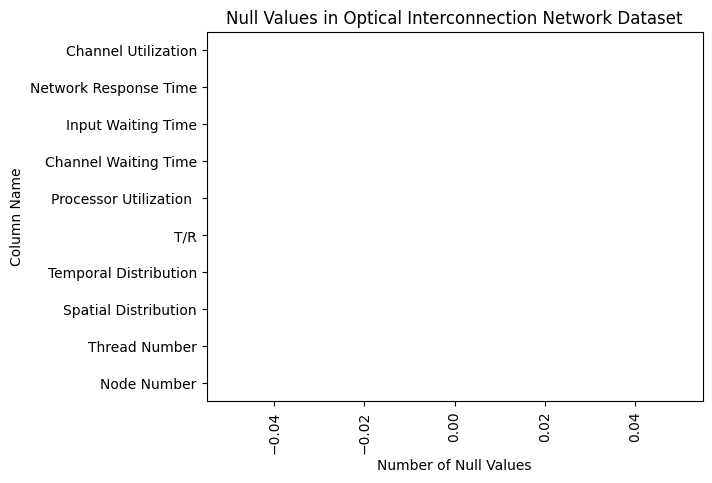

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.isnull().sum().plot(kind='barh')
plt.xlabel("Number of Null Values")
plt.ylabel("Column Name")
plt.title("Null Values in Optical Interconnection Network Dataset")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Spatial Distribution'] = le.fit_transform(df['Spatial Distribution'])
df['Temporal Distribution'] = le.fit_transform(df['Temporal Distribution'])
print(df)

     Node Number  Thread Number  Spatial Distribution  Temporal Distribution  \
0             64              4                     3                      1   
1             64              4                     3                      1   
2             64              4                     3                      1   
3             64              4                     3                      1   
4             64              4                     3                      1   
..           ...            ...                   ...                    ...   
635           16             10                     2                      0   
636           16             10                     2                      0   
637           16             10                     2                      0   
638           16             10                     2                      0   
639           16             10                     2                      0   

     T/R Processor Utilization  Channel

In [ ]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column] = [float(string.replace(',', '.')) for string in df[column]]
df.head()


,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,3,1,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,3,1,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,3,1,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,3,1,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,3,1,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


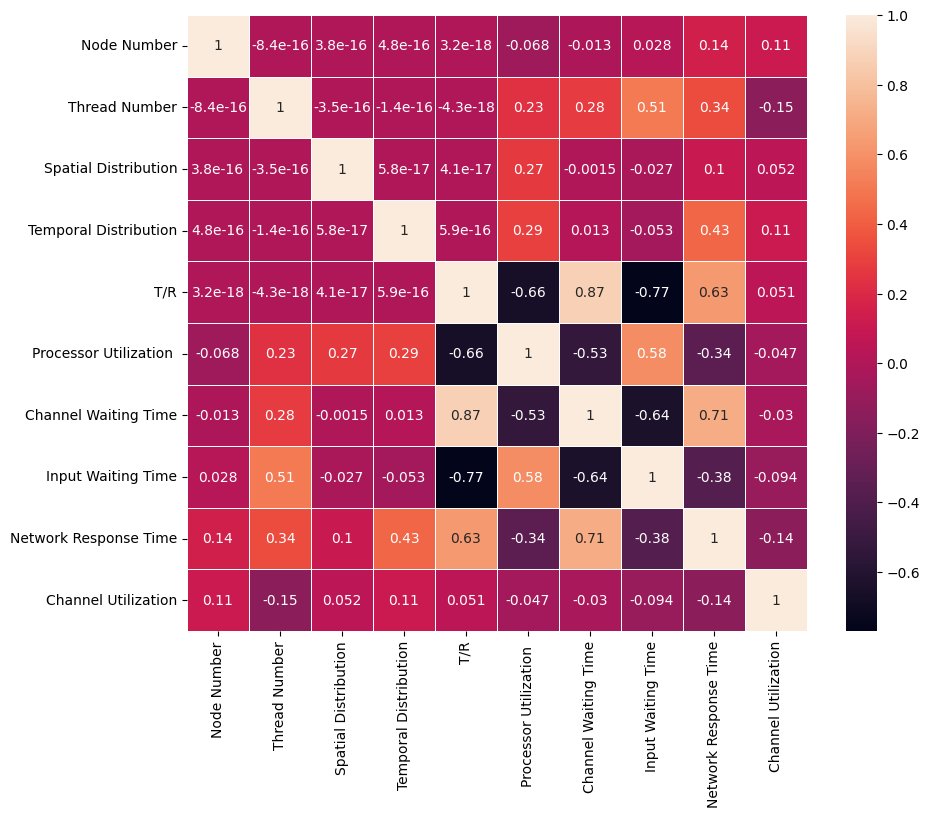

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Processor Utilization ', axis=1)
y = df['Processor Utilization ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet Regression": ElasticNet(alpha=0.1),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"MSE: {mse:.2f}")
    print()


Model: Linear Regression
Train Accuracy: 0.80
Test Accuracy: 0.73
R2 Score: 0.73
MSE: 0.01

Model: Ridge Regression
Train Accuracy: 0.79
Test Accuracy: 0.71
R2 Score: 0.71
MSE: 0.01

Model: Lasso Regression
Train Accuracy: 0.75
Test Accuracy: 0.66
R2 Score: 0.66
MSE: 0.01

Model: ElasticNet Regression
Train Accuracy: 0.43
Test Accuracy: 0.36
R2 Score: 0.36
MSE: 0.03



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [1, 10, 100]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1]},
}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5)
        grid_search.fit(X_train, y_train)
        models[name] = grid_search.best_estimator_
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"MSE: {mse:.2f}")
    print()


Model: Linear Regression
Train Accuracy: 0.80
Test Accuracy: 0.73
R2 Score: 0.73
MSE: 0.01

Model: Ridge Regression
Train Accuracy: 0.80
Test Accuracy: 0.72
R2 Score: 0.72
MSE: 0.01

Model: Lasso Regression
Train Accuracy: 0.75
Test Accuracy: 0.66
R2 Score: 0.66
MSE: 0.01

Model: ElasticNet Regression
Train Accuracy: 0.43
Test Accuracy: 0.36
R2 Score: 0.36
MSE: 0.03



In [ ]:
import pandas as pd

data = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "R2 Score": [],
    "MSE": [],
}

for name, model in models.items():
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    data["Model"].append(name)
    data["Train Accuracy"].append(train_accuracy)
    data["Test Accuracy"].append(test_accuracy)
    data["R2 Score"].append(r2)
    data["MSE"].append(mse)

table = pd.DataFrame(data)
print(table.to_string())


                   Model  Train Accuracy  Test Accuracy  R2 Score       MSE
0      Linear Regression        0.799158       0.725108  0.725108  0.011003
1       Ridge Regression        0.798589       0.724265  0.724265  0.011036
2       Lasso Regression        0.745356       0.663366  0.663366  0.013474
3  ElasticNet Regression        0.430620       0.357537  0.357537  0.025715


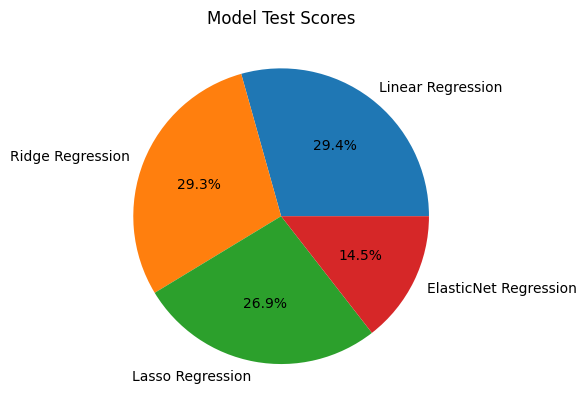

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
test_scores = [model.score(X_test, y_test) for model in models.values()]
plt.pie(test_scores, labels=model_names, autopct="%1.1f%%")
plt.title("Model Test Scores")
plt.show()


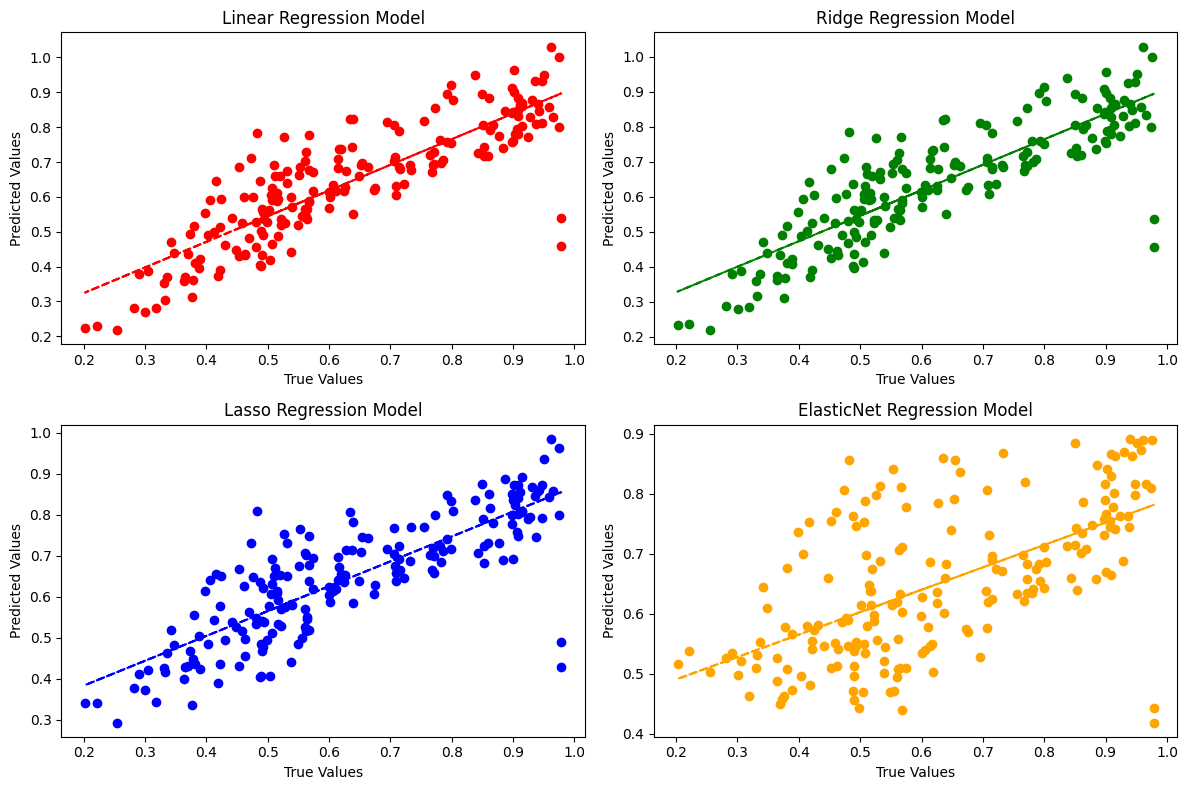

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
colors = ["red", "green", "blue", "orange"]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, (name, model) in enumerate(models.items()):
    ax = axes[i // 2, i % 2]
    ax.scatter(y_test, model.predict(X_test), color=colors[i])
    z = np.polyfit(y_test, model.predict(X_test), 1)
    p = np.poly1d(z)
    ax.plot(y_test, p(y_test), color=colors[i], linestyle="--")
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"{name} Model")
plt.tight_layout()
plt.show()


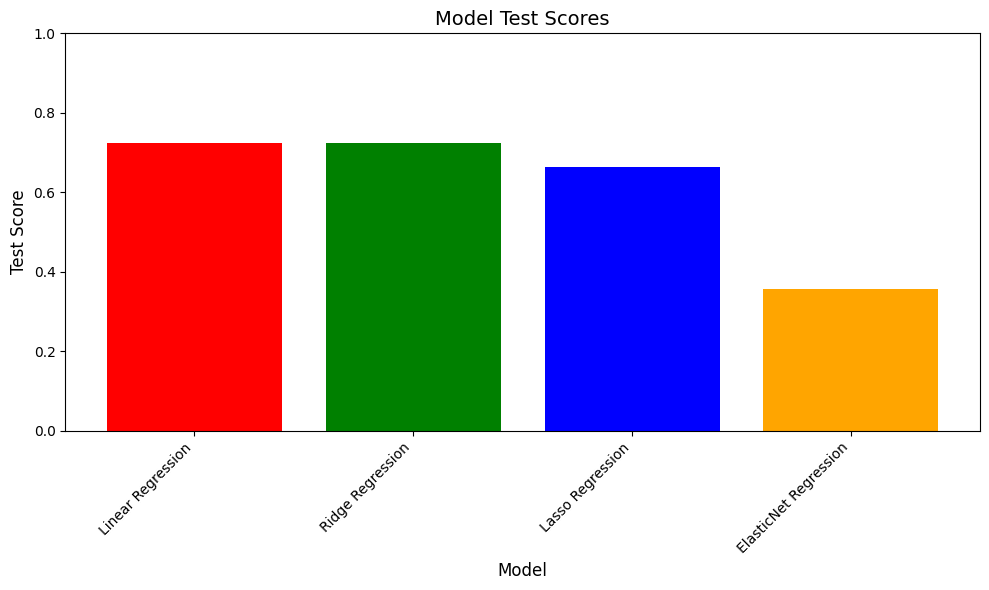

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
test_scores = [model.score(X_test, y_test) for model in models.values()]
bar_colors = ["red", "green", "blue", "orange"]

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_scores, color=bar_colors)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Test Score", fontsize=12)
plt.title("Model Test Scores", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


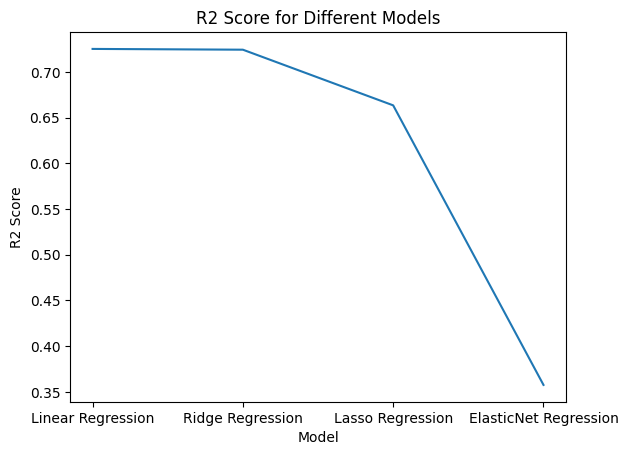

In [ ]:
import matplotlib.pyplot as plt
model_names = list(models.keys())
r2_scores = [model.score(X_test, y_test) for model in models.values()]
plt.plot(model_names, r2_scores)
plt.title("R2 Score for Different Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()
